<a name="top"></a>
<img src="https://netacad.centralesupelec.fr/img/cs.jpg" width="200" style="display:inline;">

<h1>
<center>Challenge IA 2023 : Accidentologie des vélos</center>
</h1>

---


<center>
<nav>
<a href="https://github.com/YoanGab/challenge_ia_accidentologie_velos">Github</a> |
<a href="https://latitudes.notion.site/Pr-sentation-des-projets-de-l-Open-Data-University-5abab2bb9a6e453d817fe6bdf3806413">Project description</a>
</nav>
</center>

### About the project
**Project background**  
Today, cycling accounts for only 3% of trips. The [Bicycle Plan](https://www.gouvernement.fr/dossier-de-presse/10511-dossier-de-presse-plan-velo), presented by the Government in September 2018, aims to encourage the development of this mode of travel by removing the main obstacles identified. It thus provides for actions divided into four axes, among which is the improvement of road safety through the development of bicycle facilities. The objective was to reach 55,477 km of safe bicycle facilities (bicycle paths and greenways) by 2022.

**The issue:** 
To further explore this issue, we propose to answer these two underlying questions:
- To what extent does better bicycle infrastructure reduce bicycle accidents?
- Where should bicycle infrastructure be built to reduce bicycle accidents and improve road safety? 🚲

**Project Goals**
*The overall project objective and desired impacts*

In a context where cycling infrastructure is multiplying, the work carried out as part of this challenge will help to shed light on the various initiatives relating to cycling (particularly those of local authorities) and to target developments.

### Notebook outline
1. [Importing libraries](#importing_libraries)
2. [Importing data](#importing_data)
3. [Data cleaning](#data_cleaning)
4. [Data exploration](#data_exploration)
5. [Data preparation](#data_preparation)
    1. [Selecting features](#selecting_features)
    2. [Dealing with missing values](#dealing_with_missing_values)
    3. [Encoding categorical features](#encoding_categorical_features)
    4. [Splitting the dataset](#splitting_the_dataset)
    5. [Dealing with imbalanced data](#dealing_with_imbalanced_data)
    6. [Feature scaling](#feature_scaling)
6. [Modeling](#modeling)
    1. [Logistic regression](#logistic_regression)
    2. [Decision tree](#decision_tree)
    3. [Random forest](#random_forest)
    4. [SVC](#svc)
7. [Predictions](#prediction)
8. [Conclusion](#conclusion)

<a name="importing_libraries"></a>

### 1. Importing libraries

In [1]:
# Data libraries
import pandas as pd
import numpy as np

# Data processing libraries
from src.data import AccidentData
from src.format import AccidentDataFormatter
from src.utils import missing
from src.model_eval import eval_model

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Maps
import folium
from folium.plugins import MarkerCluster

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

<a name="importing_data"></a>

### 2. Importing data

In [2]:
# Download datasets
accident_data = AccidentData()
# Merge datasets and select bike accidents
accident_data.preprocess_df()
df = accident_data.df_final
df.head()

[Check] Checking if data is in your computer...
[Check] Checking completed, no data is missing!
[Check] File already exists! loading file
[Check] File already exists! loading file


,Num_Acc,grav,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200500000030,1.0,0.0,18,0.0,0.0,2.0,7.0,17.0,A01,NaN,NaN,3.0,37.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0,50,1.0,0.0,1.0,0.0,NaN,5,1,13,1945,5,2,1,1.0,3.0,331.0,rue de la chapelle,M,5030000.0,284000.0,620
1,200500000030,1.0,0.0,1,0.0,0.0,2.0,8.0,11.0,B02,NaN,NaN,3.0,37.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0,50,1.0,0.0,1.0,0.0,NaN,5,1,13,1945,5,2,1,1.0,3.0,331.0,rue de la chapelle,M,5030000.0,284000.0,620
2,200500000034,2.0,0.0,10,0.0,0.0,9.0,3.0,15.0,A01,NaN,NaN,3.0,127.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0,50,1.0,0.0,1.0,0.0,NaN,5,1,19,1045,1,1,1,7.0,1.0,22.0,NaN,M,0.0,0.0,620
3,200500000034,2.0,0.0,1,0.0,0.0,2.0,1.0,1.0,B02,NaN,NaN,3.0,127.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0,50,1.0,0.0,1.0,0.0,NaN,5,1,19,1045,1,1,1,7.0,1.0,22.0,NaN,M,0.0,0.0,620
4,200500000078,1.0,0.0,7,0.0,0.0,2.0,2.0,15.0,A01,NaN,NaN,3.0,56.0,0.0,NaN,2.0,2.0,15.0,100.0,0.0,2.0,1.0,0,0,1.0,0.0,1.0,3.0,NaN,5,1,26,1315,1,1,9,1.0,3.0,173.0,NaN,M,0.0,0.0,20


<a name="data_cleaning"></a>

### 3. Data cleaning

In [3]:
accident_data_formatter = AccidentDataFormatter(accident_data)
accident_data_formatter.format()
df_formatted = accident_data_formatter.df_formatted
df_formatted.head()

,prof,plan,vosp,grav,lum,dep,com,int,date,lat,long,atm,circ,nbv,larrout,vma,surf,catv,Num_Acc
0,1,0,0,1,1,620,33.0,0.0,2005-01-13,50.3,2.84,0,1,0,50,NaN,0,18,200500000030
1,1,0,0,1,1,620,33.0,0.0,2005-01-13,50.3,2.84,0,1,0,50,NaN,0,1,200500000030
2,1,1,0,2,0,620,22.0,0.0,2005-01-19,0.0,0.00,2,1,0,50,NaN,0,10,200500000034
3,1,1,0,2,0,620,22.0,0.0,2005-01-19,0.0,0.00,2,1,0,50,NaN,0,1,200500000034
4,2,0,0,1,0,20,17.0,3.0,2005-01-26,0.0,0.00,0,1,2,0,NaN,0,7,200500000078


<a name="data_exploration"></a>

### 4. Data exploration

In [4]:
missing(df_formatted)

prof => 399 [0.26%]
plan => 434 [0.28%]
vosp => 844 [0.55%]
grav => no missing values [0%]
lum => no missing values [0%]
dep => no missing values [0%]
com => 1398 [0.91%]
int => 4 [0.0%]
date => no missing values [0%]
lat => 65518 [42.83%]
long => 65518 [42.83%]
atm => 11 [0.01%]
circ => 1961 [1.28%]
nbv => 716 [0.47%]
larrout => 17319 [11.32%]
vma => 124883 [81.64%]
surf => 394 [0.26%]
catv => no missing values [0%]
Num_Acc => no missing values [0%]


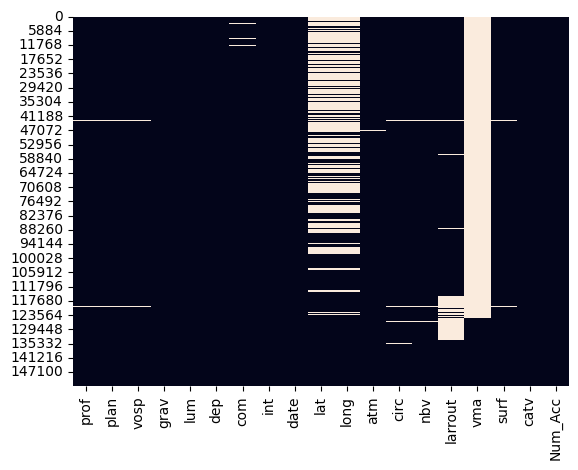

In [5]:
sns.heatmap(df_formatted.isnull(), cbar=False)
plt.show()

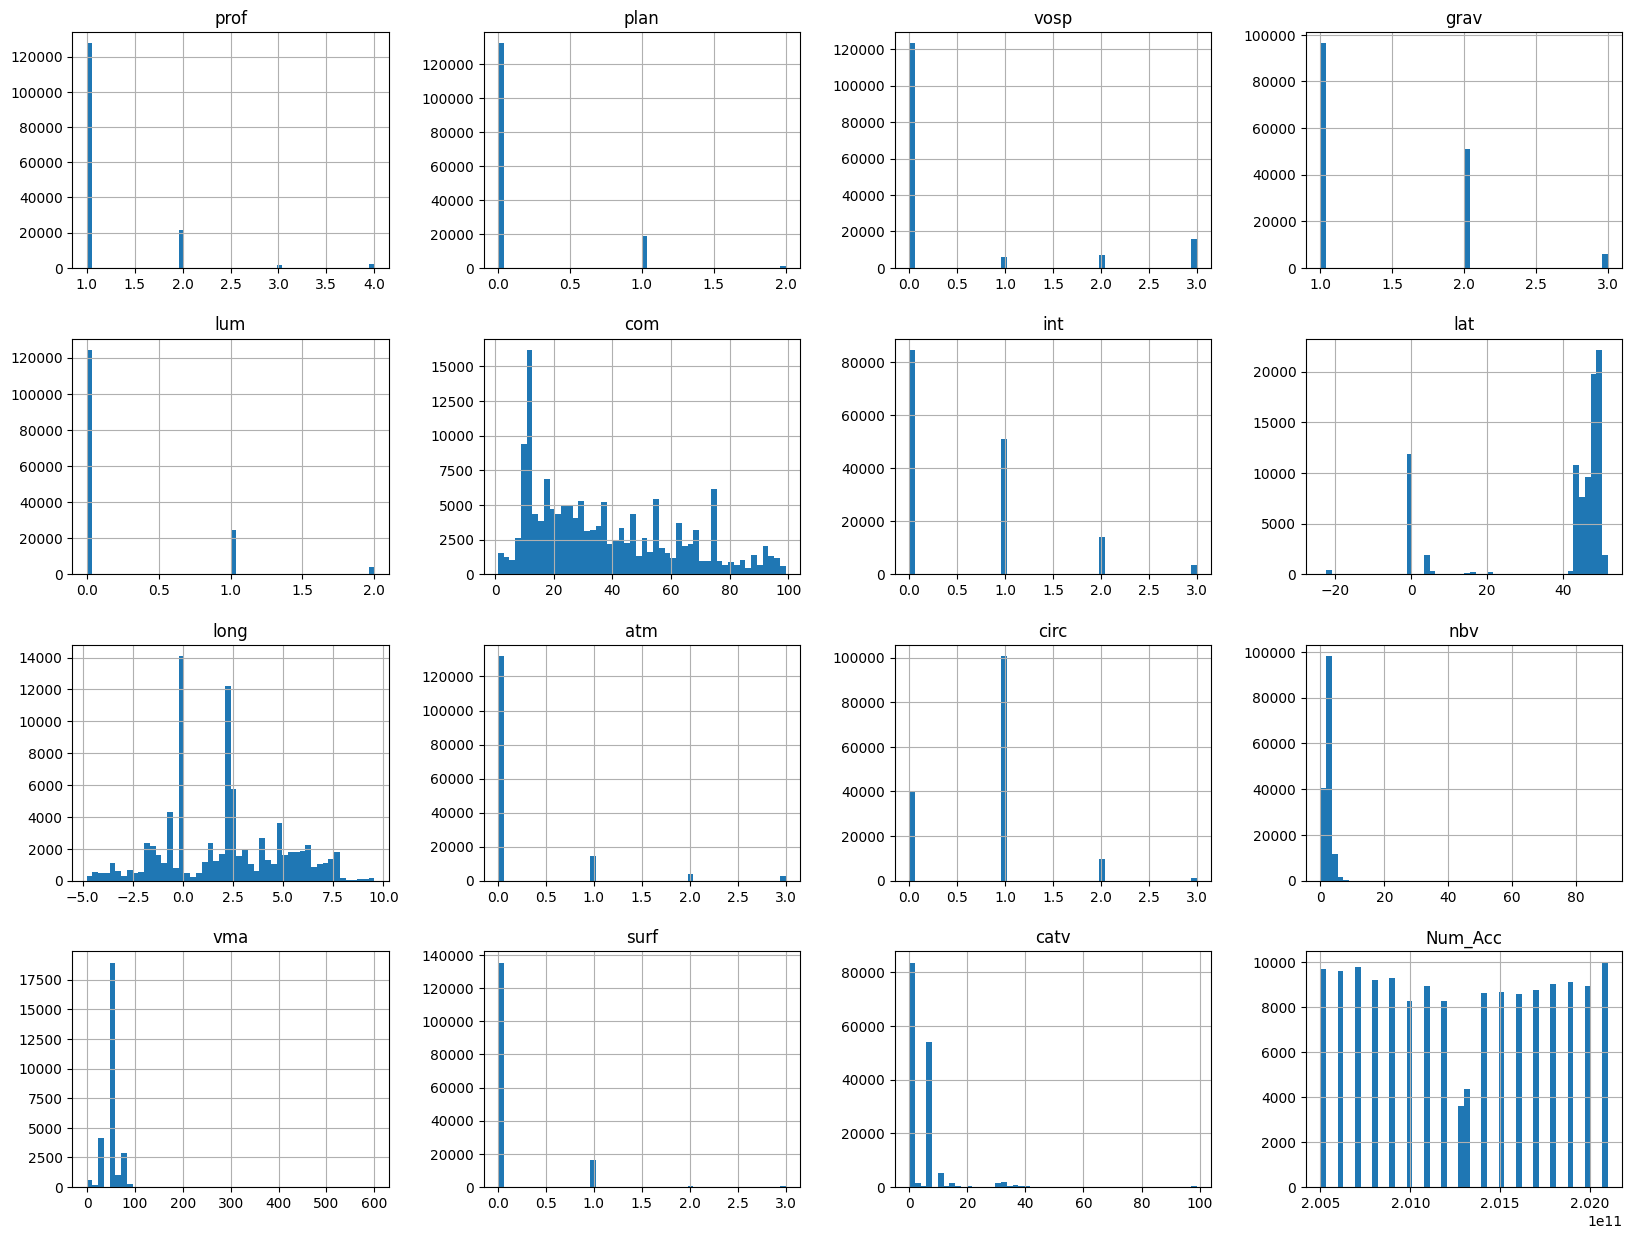

In [6]:
df_formatted.hist(bins=50, figsize=(20, 15))
plt.show()

<a name="data_preparation"></a>

### 5. Data preparation

<a name="selecting"></a>

#### 5.1 Selecting features

In [7]:
columns_to_drop_for_predictions = [
    "dep",
    "com",
    "date",
    "lat",
    "long",
    "vma",
    "larrout",
    "catv",
    "Num_Acc",
    "surf",
    "lum",
    "atm"
]
df_selected = df_formatted.drop(columns=columns_to_drop_for_predictions)

<a name="dealing_with_missing_values"></a>

#### 5.2 Dealing with missing values

In [8]:
df_no_missing_data = df_selected.dropna()

<a name="encoding_categorical_features"></a>

#### 5.3 Encoding categorical features

In [9]:
features_to_one_hot = ["prof","int"]
df_encoded = pd.get_dummies(df_no_missing_data, columns=features_to_one_hot)
df_encoded["grav"] = df_encoded["grav"].replace({1: 0, 2: 1, 3: 1})

<a name="splitting_the_dataset"></a>

#### 5.4 Splitting the dataset

In [10]:
X = df_encoded.drop(columns=["grav"])
y = df_encoded["grav"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name="dealing_with_imbalanced_data"></a>

#### 5.5 Dealing with imbalanced data

In [11]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('int'), y_train.astype('int'))

<a name="feature_scaling"></a>

#### 5.6 Feature scaling

In [12]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

<a name="modeling"></a>

### 6. Modeling

<a name="logistic_regression"></a>

#### 6.1 Logistic regression

Logistic Regression
****Results****
              precision    recall  f1-score   support

           0       0.73      0.59      0.65     18789
           1       0.48      0.64      0.55     11248

    accuracy                           0.61     30037
   macro avg       0.61      0.61      0.60     30037
weighted avg       0.64      0.61      0.61     30037



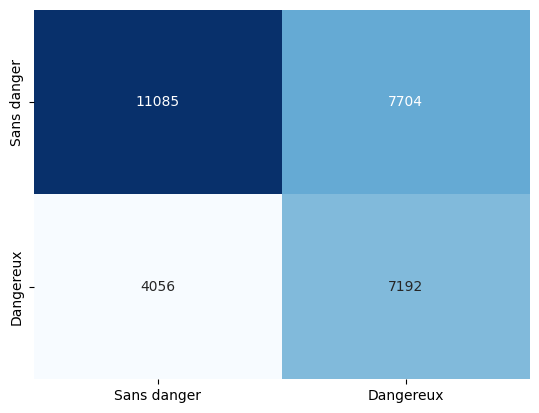

In [31]:
clf = LogisticRegression()
clf.fit(X_train_smote_scaled, y_train_smote)
y_pred = clf.predict(X_test_scaled)
eval_model(y_test.astype(int), y_pred, "Logistic Regression")

<a name="decision_tree"></a>

#### 6.2 Decision Tree

Random Forest
****Results****
              precision    recall  f1-score   support

           0       0.73      0.64      0.68     18789
           1       0.50      0.61      0.55     11248

    accuracy                           0.63     30037
   macro avg       0.62      0.62      0.62     30037
weighted avg       0.65      0.63      0.63     30037



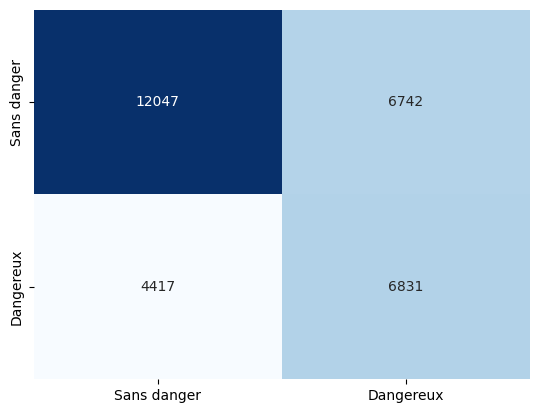

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote_scaled, y_train_smote)
y_pred = dt.predict(X_test_scaled)
eval_model(y_test.astype(int), y_pred, "Decision Tree")

<a name="random_forest"></a>

#### 6.3 Random forest

Random Forest
****Results****
              precision    recall  f1-score   support

           0       0.73      0.66      0.69     18789
           1       0.51      0.59      0.55     11248

    accuracy                           0.63     30037
   macro avg       0.62      0.62      0.62     30037
weighted avg       0.65      0.63      0.64     30037



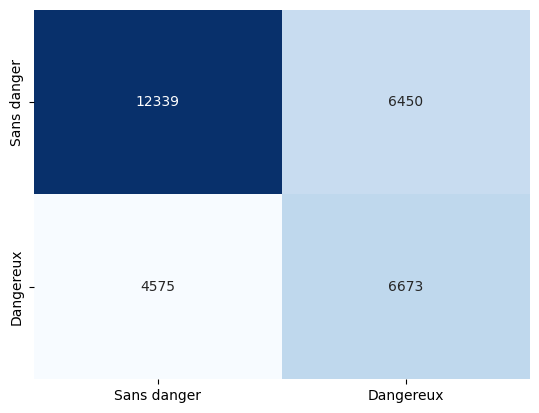

In [34]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train_smote_scaled, y_train_smote)
y_pred = rf.predict(X_test_scaled)
eval_model(y_test.astype(int), y_pred, "Random Forest")

<a name="svc"></a>

#### 6.4 SVC


In [36]:
svc = SVC()
svc.fit(X_train_smote_scaled, y_train_smote)
y_pred = svc.predict(X_test_scaled)
eval_model(y_test.astype(int), y_pred, "SVC")

<a name="prediction"></a>

### 7. Predictions

In [ ]:
y_pred_proba = clf.predict_proba(X_test_scaled)

In [ ]:
columns_to_drop_for_predictions = [
    "dep",
    "com",
    "vma",
    "larrout",
    "catv",
    "Num_Acc",
    "surf",
    "lum",
    "atm",
    "date"
]
df_selected = df_formatted.drop(columns=columns_to_drop_for_predictions)

In [ ]:
df_no_missing_data = df_selected.drop(columns=["lat","long"]).dropna()
features_to_one_hot = ["prof","int"]
df_encoded = pd.get_dummies(df_no_missing_data, columns=features_to_one_hot)
df_encoded["grav"] = df_encoded["grav"].replace({1: 0, 2: 1, 3: 1})
df_scaled = scaler.transform(df_encoded.drop(columns=["grav"]))

In [ ]:
y_pred = clf.predict_proba(df_scaled)[:,0]
df_pred = pd.DataFrame(y_pred, columns=["predicted"])
df_pred = df_selected.dropna(subset=df_no_missing_data.columns).reset_index(drop=True).join(df_pred)

In [ ]:
def make_map(df):
    #Create the base Map
    m = folium.Map(location=[48.866667,2.333333], tiles='OpenStreetMap', zoom_start=12)

    #markerCluster = MarkerCluster().add_to(m)
    for i, row in df.iterrows():
        lat = df.at[i,'lat']
        lng = df.at[i,'long']

        risk = df.at[i,'predicted']
        if risk > 0.8:
            color = 'green'
        elif risk > 0.6:
            color = 'lightgreen'
        elif risk > 0.4:
            color = 'orange'
        elif risk > 0.2:
            color = 'lightred'
        else:
            color = 'red'
            
        folium.CircleMarker(location=[lat, lng], radius=2, popup=risk, color=color, fill_color=color).add_to(m)
    m.save("data/predictions_paris_after_2019.html")

make_map(df_pred.dropna())

<a name="conclusion"></a>

### 8. Conclusion

As a conclusion, we can say that the model we have built is not very accurate. We can improve it by adding more features and by using more complex models. We can also try to use other algorithms such as XGBoost or LightGBM.

## References

[1] [Accidentologie des vélos](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-021-00265-y)
